# Regression Modelling 12
## Diagnostic Plots, Leverage, Cooks Distance & Outliers

In [2]:
# Regression Modelling 11
## Dropping an indicator variable from a model does not remove the observations from the analysisinstall.packages("tidyverse")
require(tidyverse)

college_df <- read.table(url("http://jupyter-regressions.s3.eu-west-1.amazonaws.com/collgpa.csv"), 
                           sep=",", header = T, stringsAsFactors = F)

head(college_df)

ID,Verb,Math,Gpa
1,81,87,3.89
2,68,99,3.32
3,57,86,2.58
4,100,49,1.57
5,54,83,2.73
6,82,86,3.96



Call:
lm(formula = Gpa ~ Verb + Math, data = college_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60273 -0.29620  0.09961  0.36998  0.54313 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.905450   0.606037  -1.494 0.143642    
Verb         0.027974   0.004939   5.664 1.79e-06 ***
Math         0.026139   0.006048   4.322 0.000112 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4938 on 37 degrees of freedom
Multiple R-squared:  0.5545,	Adjusted R-squared:  0.5304 
F-statistic: 23.03 on 2 and 37 DF,  p-value: 3.189e-07


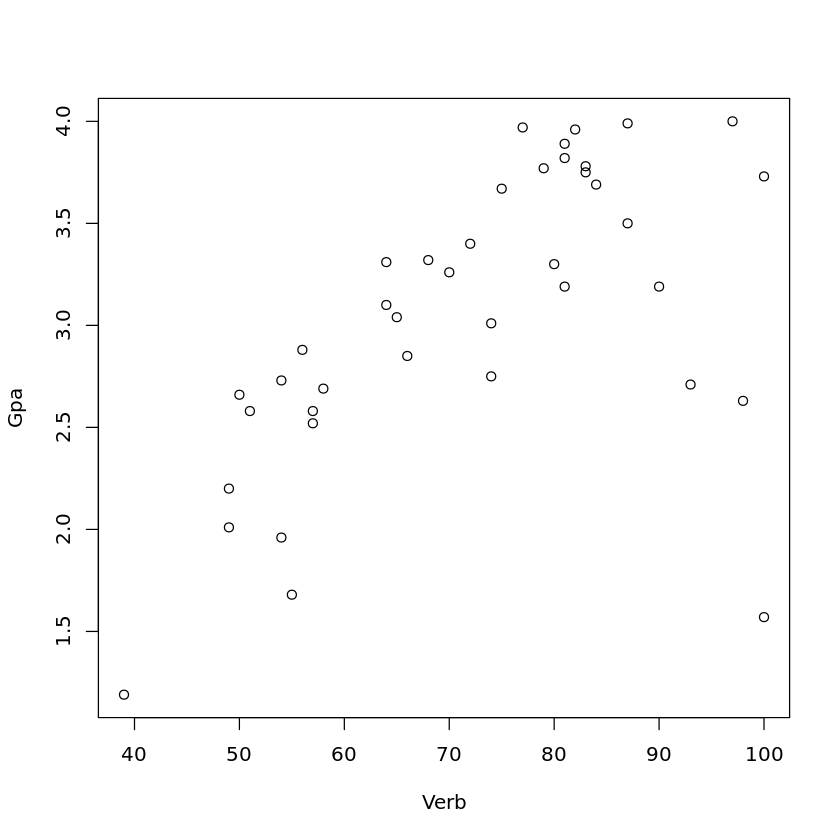

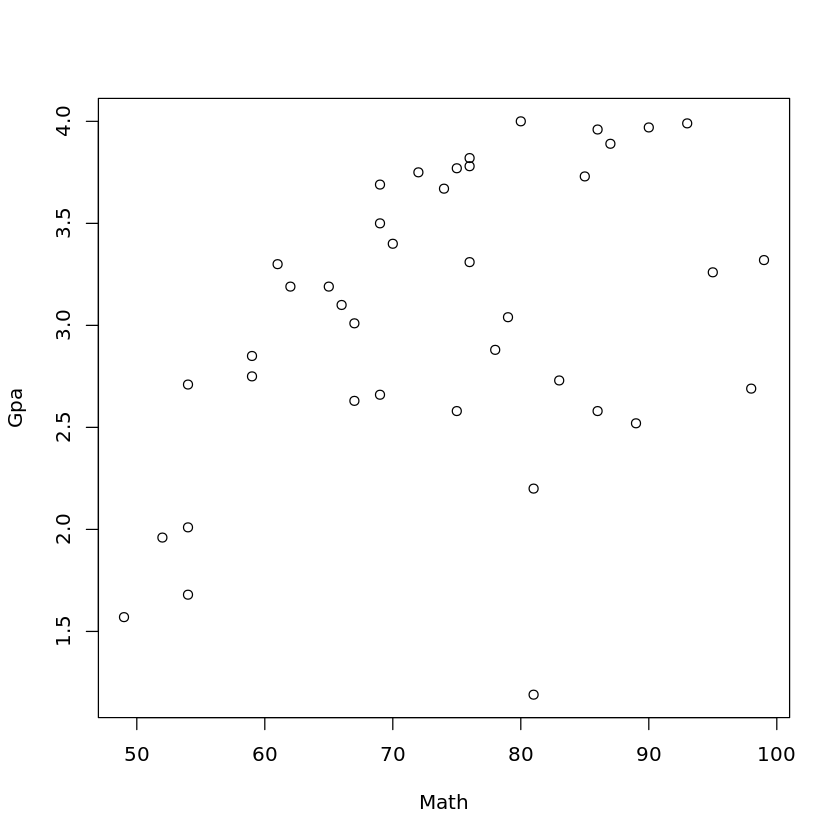

In [3]:
college_lm <- lm(Gpa~Verb+Math, college_df)
summary(college_lm)
plot(Gpa~Verb+Math, college_df)

## Assessing Zero Mean & Outliers with Studentised Residuals

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


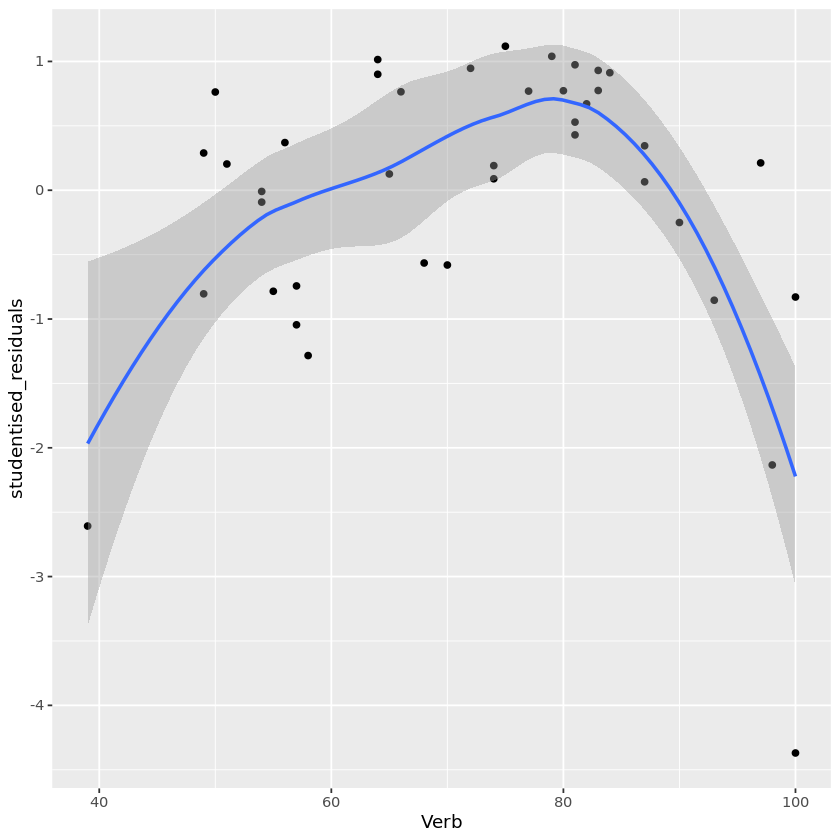

In [4]:
studentised_residuals <- rstudent(college_lm)
college_model <- cbind(fortify(college_lm), studentised_residuals)

ggplot(college_model, aes(x=Verb,y=studentised_residuals)) +
       geom_point() + geom_smooth()

## Interactions and Transformations


Call:
lm(formula = Gpa ~ Verb + Math + Verb * Math + I(Verb^2) + I(Math^2), 
    data = college_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50180 -0.05485  0.02719  0.10687  0.35148 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.2229715  1.4720009  -4.907 2.27e-05 ***
Verb         0.1262617  0.0230892   5.468 4.23e-06 ***
Math         0.1170340  0.0290549   4.028 0.000299 ***
I(Verb^2)   -0.0011301  0.0001275  -8.866 2.32e-10 ***
I(Math^2)   -0.0010630  0.0001733  -6.135 5.76e-07 ***
Verb:Math    0.0008780  0.0001565   5.611 2.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2034 on 34 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9203 
F-statistic:  91.1 on 5 and 34 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


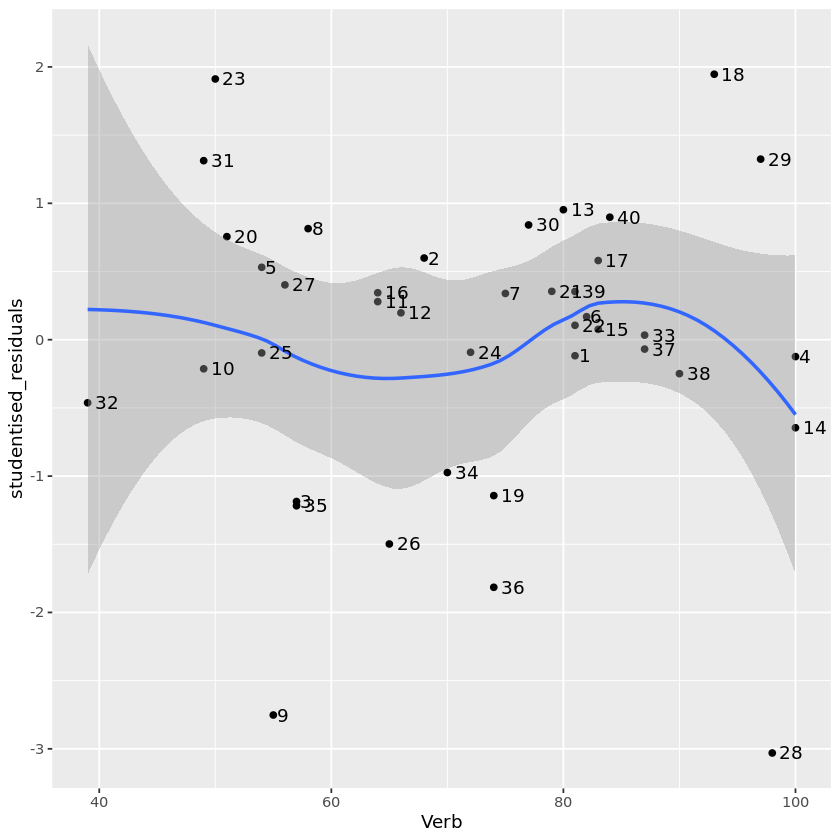

In [5]:
college_lm2 <- lm(Gpa~Verb+Math+Verb*Math+I(Verb^2)+I(Math^2), college_df)
summary(college_lm2)

studentised_residuals <- rstudent(college_lm2)
college_model2 <- cbind(fortify(college_lm2), studentised_residuals, college_df$ID)
colnames(college_model2)[13] <- "ID"

ggplot(college_model2, aes(x=Verb,y=studentised_residuals)) +
       geom_point() + geom_smooth() +
       geom_text(aes(label=ID), hjust = -0.3)

## QQ Plot and Other Diagnostics

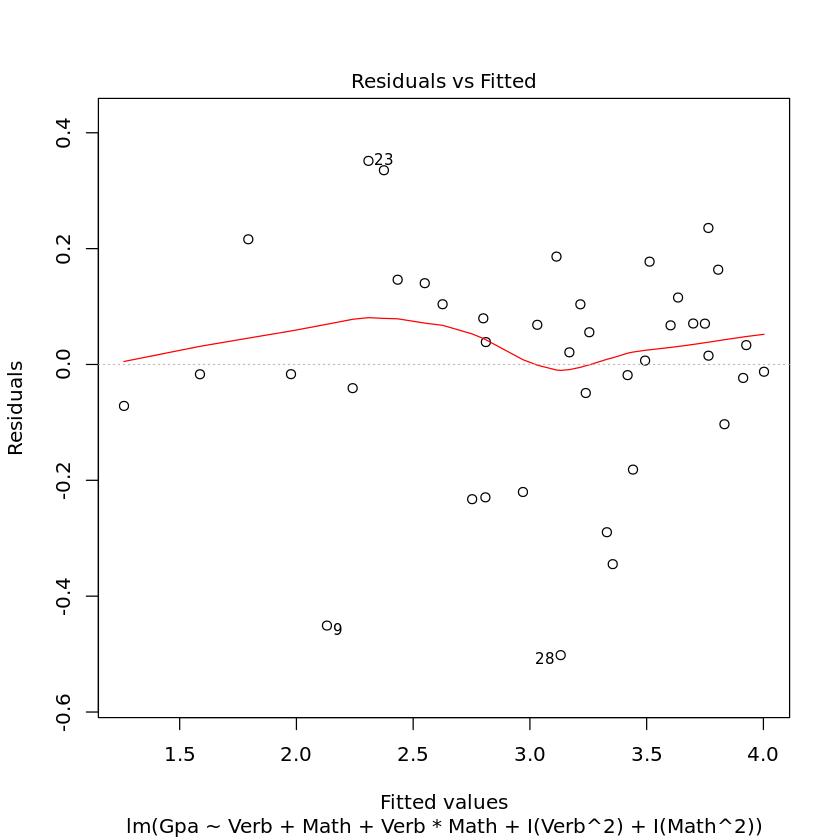

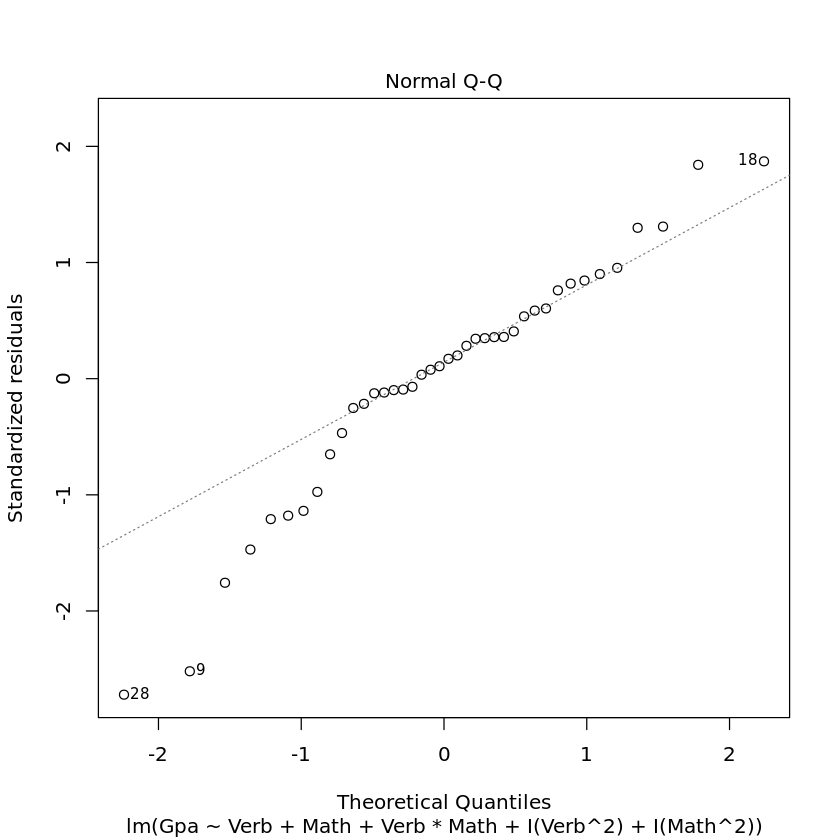

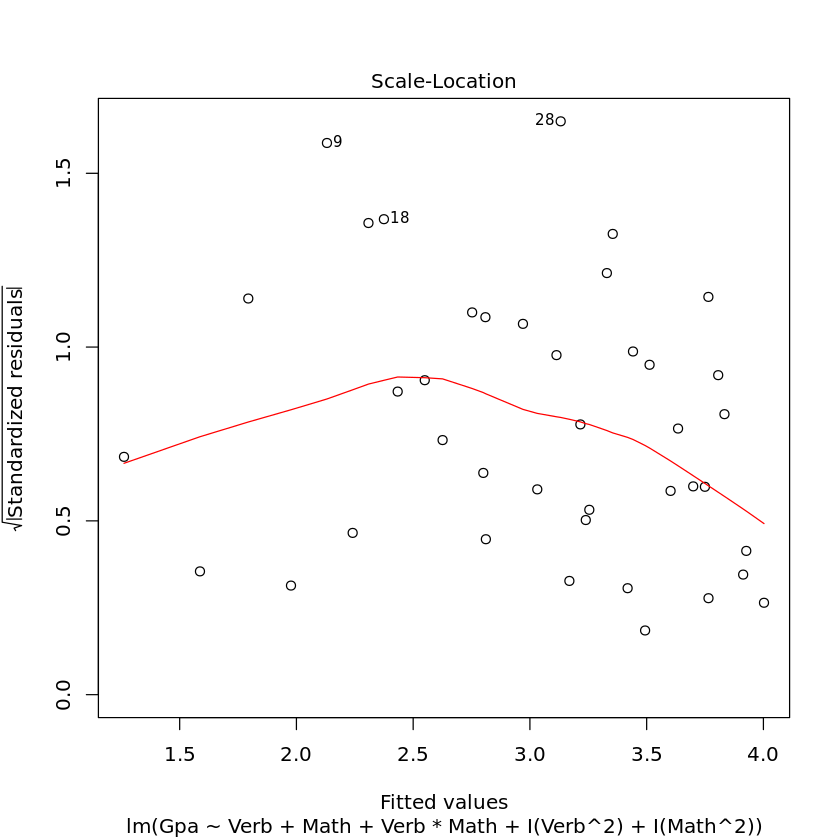

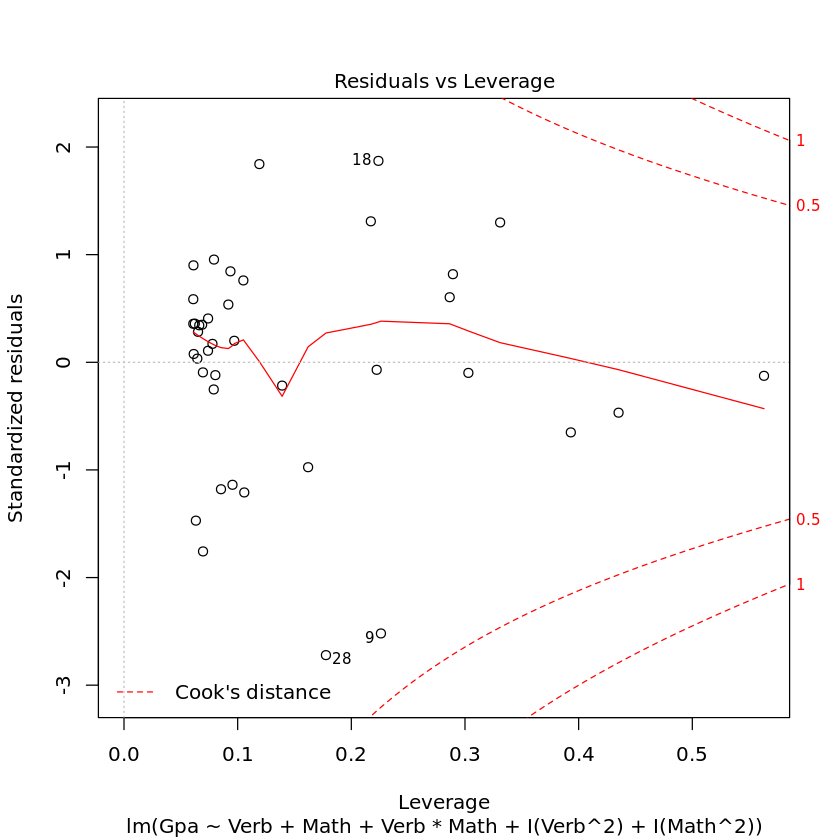

In [6]:
plot(college_lm2, labels.id = NULL)

## The diagnostic plots show residuals in four different ways:

**Residuals vs Fitted** Used to check the **linear relationship** assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good. 

**Normal Q-Q** Used to examine whether the **residuals are normally distributed**. It’s good if residuals points follow the straight dashed line.

**Scale-Location** (or Spread-Location). Used to check the homogeneity of variance of the residuals (**homoscedasticity**). Horizontal line with equally spread points is a good indication of homoscedasticity. This is not the case in our example, where we have a heteroscedasticity problem.

**Residuals vs Leverage** Used to **identify influential cases**, that is extreme values that might influence the regression results when included or excluded from the analysis. 

Side notes: 
- None of these plots show Studentised (Deleted) residuals on any axis, some use regular residuals while others use standardised. Cooks distance takes the studentised residuals as a paramater, but if you want  a clear picture of studentised residuals you will need to extract and plot seperately. (See: https://online.stat.psu.edu/stat462/node/247/)

- None of these plots help use diagnose for autocorrelation (independance assumption), multicolinearity/ covariance.

### Leverage
See: https://online.stat.psu.edu/stat462/node/170/

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


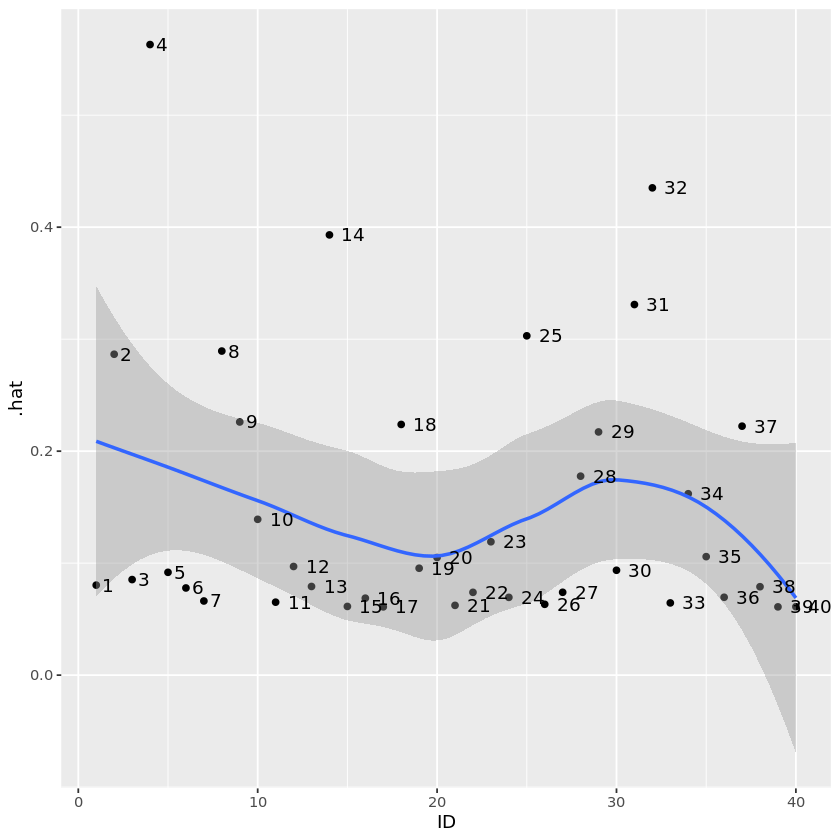

In [7]:
ggplot(college_model2, aes(x=ID,y=.hat)) +
       geom_point() + geom_smooth() +
       geom_text(aes(label=ID), hjust = -0.5)

### Observations:
- Outliers (Standardised): 9, 28
- Leverage: 4(>0.5), 32(>0.4), 14 (>0.35)
- Cooks Distance: No values >0.5